<a href="https://colab.research.google.com/github/CamK2/cis490/blob/main/Cam%20Kneeppel%2C%20Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - __*SEARCH*__ (150 pts total)

<font color="red">__*PLEASE:* YOU MUST WRITE YOUR OWN CODE, YOU MAY NOT SHARE CODE, YOU CAN DISCUSS WITH EACH OTHER, YOU CAN USE ANY RESOURCE ON THE INTERNET__</font>❗

<img src="https://img.freepik.com/free-vector/black-robot-holding-magnifying-glass-data-search-artificial-intelligence_48369-37442.jpg?size=338&ext=jpg" width=200>

Trying to find an optimal strategy for an agent can be viewed as a search through a [**space**](https://www.youtube.com/watch?v=BVn1oQL9sWg&t=44s) of possible solutions. For example, one type of open loop solution in MountainCar
that we discussed, involved:

  * First going left (i.e. reverse or action = 0) for a fixed number of steps (*num_left*).
  * Then, going right (action = 2) until done

The search space in this case becomes a one dimensional search for the ideal number of left steps to take (**num_left**) before going right. In other words, the problem is: find the *optimal* **num_left**, where optimal means it gets the car to the flag in the lowest number of steps on average.  

Because the MountainCar environment has a random element (i.e. the car starts in a slightly random position near the bottom of the hill), we would need to test each option of **num_left** several times in order to calculate an average. In problems where a large number of steps can be easily done, we can simply use a **brute force** - style of search, i.e. try every possible solution to find the best.

When the problem is such that it is too computationally intensive to perform a brute force search in a reasonable amount of time, we can use a variety of **local search** algorithms. **local search** refers generally to the concept that you evaluate a single point in the solution space, (the first point is usually random, lets call it Solution zero, or $S_0$), then take a next step to a new spot in the solution space (lets call it $S_1$) that is *fairly* close (i.e. local) to the spot you were just at. By *evaluate* we mean calculate or estimate some cost or benefit. For MountainCar, the cost is the number of steps (i.e. delay) that it takes for the car to reach the flag. For some problems, there is a direct formula for evaluating the cost as well as the slope of the cost with respect to one of the variables. There is no such formula for MountainCar, we are at the mercy of running the simulation environment serveral times to evaluate the average delay for a givein solution, and have no direct way to calcuate how muuch the delay will go down or up if we increase or decreate the number of left steps from a solution we just evaluated. In these types of problems, we typically use **randomized local search**, that is, sthe next step we take in searching the solution space ($S_{t+1}$, where t is time, t+1 is the next step) is to take a random step in a random direction. If the new solution space spot $S+{t+1}$ is better than the last $S_t$, we continue along this "path", and take the next next random step $S_{t+2}$ a random step away from $S_{t+1}$. If the new spot $S_{t+1}$ is worse than $S_t$, we "go back" to $S_t$ and try a new random step $S_{t+1'}$ (note the prime)in the solution space. **hill climbing** is the general term for accepting a new step if it is better than the last. 

One particularly intersting randomized local search technique is analogized with the process of *annealing metal*, i.e heating up metal and slowly cooling it down to encourage a *lower-energy, more-stable state* in which crystallization with a low number of deformtities is encouraged. In **simulated annealing**, we modify hill climbing such that, if the next solution $S_{t+1}$ evaluated is worse than the last $S_{t}$, we flip a loaded coin to decide if we accept the worse solution $S_{t+1}$ and continue the search from there, or go back to the previous better solution $S_{t}$.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1L50SeRkXL_rL21NWTQ_yTP1reDLi5okSnkGag_aO4umzpMfdck9mnpGNKngswXz-udc&usqp=CAU">

###Part I QUESTIONS (50 pts)

For each, please give a one sentence answer.

**What are the differences from breadth-first search and depth-first search?** Breadth-first search starts from the top node and works its way down, whereas Depth-first search searches as far down a node line as it can before backtracking. If it were a bunch of boxes, breadth-first search would open box 1, then open all the boxes inside box 1, and so on. Depth first search would open box 1, open the first box inside box 1, then open the first box inside the first box in box 1 and so on.

**What is brute force search?** Brute force search is trying every possible candidate for a solution until it finds the best/right one. This can take too long to use practically in some situations.

**What is hill climbing?** Hill climbing is a search algorithm that continuously moves "upward" until it finds the "peak" (best measures to satisfy the solution). *This may involve moving down on a graph, say, in terms of trying to get the shortest time to complete a task. In this case the best solution would be the lowest point on a graph of time.

**What is beam search?** Beam search searches for the best candidate nodes, looks into those nodes, picks the best candidates from those nodes and so on. It is a faster search since the candidate nodes are typically more likely to contain the best solution.


###Part II - Brute force search of 1d in Mountain Car (25pts)::



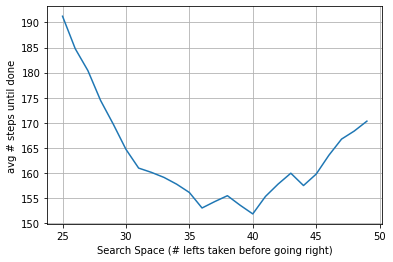

In [ ]:
# brute force search of one type of MountainCar agent: an
# agent that goes a number of lefts first, then right until done
import gym
import matplotlib.pyplot as plt  # This import is for plotting (2d graph)

num_repeats = 1000  # The number of times gym env is run for each search point
search_space = list(range(25,50))  # All potential #lefts before going right
avg_score_list = [] 

env = gym.make("MountainCar-v0")

for num_lefts in search_space:
  #print('#lefts = ', num_lefts, end='')
  result_list = []
  for iteration in range(num_repeats):
    observation = env.reset()
    step_i = 0  # use this variable as a counter for each step taken
    while True:    
      if step_i < num_lefts:
        action = 0
      else:
        action = 2
      observation, reward, done, info = env.step(action) 
      step_i = step_i + 1

      # if car reaches the flag, exit the loop
      if done: 
        break;
    result_list.append(step_i)
  score = sum(result_list)/num_repeats
  #print(', avg score=', score)
  avg_score_list.append(score)
env.close()

# The following code is for making a plot of score vs. # lefts
plt.plot(search_space, avg_score_list)
plt.xlabel('Search Space (# lefts taken before going right)')
plt.ylabel('avg # steps until done')
plt.grid()
plt.show()

1. Explain what is going on in the figure above. Be sure to answer:
  * What is the program doing generally?
    * Answer: The program is running the mountain car simulation 10 times for each amount of steps to go left first. So the first 10 simulations, the mountain car goes left for only one step, then goes right for the rest of the sim and records the total nuber of steps taken. The next 10 simulations, the car will go left for two steps, then go right, and so on. Eventually we get a graph that shows the number of steps taken to reach the goal, cross-referenced with the number of steps taken to the left first. 
  * Why does it look so noisy?
    * Answer: The graph looks "noisy" because the program took a relatively small number of simulations for each step value, only 10 per step. Less data makes a noisier graph.
  * How can you make it look less noisy?
    * Answer: We could make this graph less noisy by increasing the number of simulations per steps to the left, like 100 or 1000 instead of 10. This would most likely smooth the graph out.
  * How can you speed up the evaluation?
    * Answer: 
    1. Use a different programming language since python is typically slower
    2. Take a smaller number of simulations per steps to the left, so you are running less simulations overall
    3. Choose a certain range of steps to the left to simulate based on previous results. If there are ranges where the car never seems to reach the goal, then don't simulate those and this will speed up the evaluation

1. Modify the code in the cell above so that it uses 1000 repeats at each search point (i.e. each value for num_lefts), and limits the search to the range of only 25 to 50 num_lefts.  

1. Rerun the code with your changes and answer the following:
  * What did you learn from the modifications?
    * Answer: We now have a bell-shaped curve showing the results for each number of steps to the left. It appears that the fastest results are achieved when the car goes left for the first 35 to 42 steps. This is a more accurate average as well because we ran 1000 simulations for each number of steps to the left (25-50) instead of just 10 simulations.
  * What were the benefits and disadvantages of your changes?
  * **Benefits:** We have a more accurate representation of the average number of steps to reach the goal for each number of steps to the left first. The information is more reliable and outlines an area where the best performance can be expected.

  * **Disadvantages:** We could only see results for moving the car to the left between the first 25 and 50 steps, so we don't have a  representation of ALL possible values to move to the left and their average time-step results.

  * Do you think its possible to find a better **agent** (i.e. not a better search method)? If so, how does it operate?
    * Answer: There could be a better agent. A closed loop agent would be able to "see" its environment and choose directions to go based on its position and velocity. This could make the agent adapt to every unique scenario and increase the speed at which it reaches its goal every time.




###**Part III - Hill-climbing (25pts)**

The following cell performs a randomized local search of the num_left space for agents of the type that go left for num_lefts and then go right until done. Think of each value of num_lefts as a point in the search space.

####**Picking the next search point**
The code randomly selects between either +1 and -1 for the next spot to evaluate. For example, if the code just finished evaluating num_lefts = 20, the next value of num_lefts to evaluate will be randomly picked between 19 and 21.

####**Deciding whether to use the next search point**
If the next search point results in a better (lower) score, the search will continue from the next point. If it is not better, the code will "go back" to the last value of num_lefts and try to randomly pick a search point again.

####**Deciding when to stop**
If the last 5 attempts of picking a next search point fail (i.e. result in a lower score than the current point), the search will stop.

1. Modify the code below so that the search point is randomly selected from +3, +2, +1, -1, -2, or -3 from the current point. Run the code after the change. 

1. Modfiy the code so that instead of always rejecting a new point that results in a worse, you unstead flip a coin, and 50% of the time, accept it as the next new point. Run the code after this change.

1. Answer the following questions:  
  * How does the performance of each version of code compare? Is it what you expect?
  * In search problems, there is often a tradeoff of chances of finding a better/best solution vs. the amount of time you spend (yielding yet another type of optimization problem of optimizing bang for buck of computing. Which parameters or techniques can you adjust to adjust this bang for buck?

search iter# 0  current #lefts =  25
, avg score= 184.98
search iter# 1  current #lefts =  25
, avg score= 186.44
search iter# 2  current #lefts =  25
, avg score= 187.78
search iter# 3  current #lefts =  25
, avg score= 191.96
search iter# 4  current #lefts =  25
, avg score= 191.18
search iter# 5  current #lefts =  25
, avg score= 193.08
search iter# 6  current #lefts =  25
, avg score= 182.6
search iter# 7  current #lefts =  25
, avg score= 192.9
search iter# 8  current #lefts =  28
, avg score= 168.0
search iter# 9  current #lefts =  31
, avg score= 152.52
search iter# 10  current #lefts =  30
, avg score= 168.28
search iter# 11  current #lefts =  29
, avg score= 180.86
search iter# 12  current #lefts =  28
, avg score= 174.92
search iter# 13  current #lefts =  26
, avg score= 184.72
search iter# 14  current #lefts =  29
, avg score= 177.0
search iter# 15  current #lefts =  32
, avg score= 151.76
search iter# 16  current #lefts =  31
, avg score= 168.02
search iter# 17  current #le

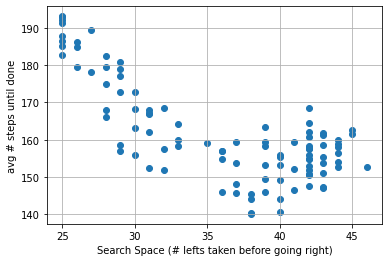

In [17]:
import gym
import matplotlib.pyplot as plt  # This import is for plotting
import random
import numpy as np

def pick_next_point(current_point):
  deltas = [-3,-2,-1,1,2,3]
  next_point = current_point + random.choice(deltas)
  if next_point < 25:
    next_point = 25
  if next_point > 55:
    next_point = 55
  return next_point

def eval_point(num_lefts, num_repeats, env):
  """Evaluates and returns the average delay until done when using num_lefts. 
  """
  result_list = []
  for iteration in range(num_repeats):
    observation = env.reset()
    step_i = 0  # use this variable as a counter for each step taken
    while True:    
      if step_i < num_lefts:
        action = 0
      else:
        action = 2
      observation, reward, done, info = env.step(action) 
      step_i = step_i + 1

      # if car reaches the flag, exit the loop
      if done: 
        break;
    result_list.append(step_i)

  score = sum(result_list)/num_repeats
  return score


#---------------------------------------
avg_score_list = [] 

env = gym.make("MountainCar-v0")

# randomly pick an starting value for num_lefts
num_lefts = int(random.random()*100)
search_complete = False
num_repeats_for_eval = 50
max_search_iter = 100
score = eval_point(num_lefts, num_repeats_for_eval, env)

search_i = 0
while not search_complete:
  #pick next point
  last_num_lefts = num_lefts
  last_score = score
  num_lefts = pick_next_point(num_lefts)
  print('search iter#', search_i, end='')
  print('  current #lefts = ', num_lefts)

  #evaluate this point
  score = eval_point(num_lefts, num_repeats_for_eval, env)
  print(', avg score=', score)
  avg_score_list.append([num_lefts, score])
  
  #acceptance or rejection
  if (score > last_score):
    #if new point is worse than last point, flip a coin 
    x = random.randint(0,1)
    if x == 0:
      num_lefts = last_num_lefts

  # evaluate if it is time to stop
  search_i += 1
  if search_i >= max_search_iter:
    search_complete = True
env.close()

print(avg_score_list)
avg_score = np.array(avg_score_list)
# The following code is for making a plot of score vs. # lefts
plt.scatter(avg_score[:,0], avg_score[:,1])
plt.xlabel('Search Space (# lefts taken before going right)')
plt.ylabel('avg # steps until done')
plt.grid()
plt.show()

In [14]:
#Random Number Generator, returns either 0 or 1
x = random.randint(0,1)
print(x)

1


Search - Steepest decent/Hill-climbing

##Part IV - Adversarial Search (50pts)##

An **adversarial search** is a search in a game in which there are multiple adversaries, such as tic tac toe, chess, backgammon, go, as well as games with more than two opponents, such as chinese checkers or risk.

The **MiniMax Strategy** (aka MinMax and MaxiMin)
is a agent and search strategy used not only in AI, but also game theory, which assumes the opponent will play a perfect next move, so the agent should play the next move which minimizes the opponent's best possible outcome. In other words, when it is the agent's turn, it must search ahead at least the next two moves, and pick the move that gives the opponent the worst best option. (Please take a moment to think about that and make sure you understand).


###Tic Tac Toe"


1. (0pts) Run the code to see how the random_agent performs. Be sure to read the random_agent function and understand it.
2. (25 pts) Finish implementing the function agent1, the look ahead 1 move agent. Take note of the performance provided by the eval functions.
3. (25 pts) Finish implememting the function agent2, the look ahead by 2 minimax strategy. 

If you can't get the code working, provide an explanation of how you expect it should work and what you expect the results to be. If you get it working (and it is right, you get full credit). However, if there is a bug, in order to maximize your chances of partial credit, you can also add an explanation of how you think it should work and whether the results are what you expect.

In [ ]:
# This code implements the TIC TAC TOE engine as well as a random_agent,
# and code to run it over and over in order to evaluate it. You don't have to 
# read and understand all the code, but you should at least read the function
# names, arguments, and each function's """ """ comments.
import random

# the 3-in-a-row cell combinations that result in a win
WINS = ((0,1,2),(3,4,5),(6,7,8),(0,3,6),(1,4,7),(2,5,8),(0,4,8),(2,4,6))

def valid_next_moves(board):
  """Returns a list of valid next moves given the board_state. 
  - Cells are referred by their 0-8 index (i.e. not 1-9). For example
  - if the board is empty, it will return [0,1,2,3,4,5,6,7,8]. """
  moves_list = []
  # cycle through all the cells. If it is empty, add i to moves_list
  for i in range(9):
    if board[i] == '-':
      moves_list.append(i)
  return moves_list

def get_x_cells(board):
  """Returns a list of cells that have X's in them."""
  return [i for i,v in enumerate(board) if v=='X']

def get_o_cells(board):
  """Returns a list of cells that have O's in them."""
  return [i for i,v in enumerate(board) if v=='O']
  
def is_x_winner(board):
  """Returns True if there are three X's in a row, otherwise False"""
  x_cells = get_x_cells(board)
  
  for win in WINS:
    if len(set(win) & set(x_cells)) == 3:
      return True
  return False

def is_o_winner(board):
  """Returns True if there are three O's in a row, otherwise False"""
  o_cells = get_o_cells(board)
  
  for win in WINS:
    if len(set(win) & set(o_cells)) == 3:
      return True
  return False

def is_game_over(board):
  """ Returns 'X' if X won; 'O' if O won; 'CAT' if Cat's game, otherwise False. 
  """
  if is_x_winner(board):
    return 'X'
  elif is_o_winner(board):
    return 'O'
  elif valid_next_moves(board) == []:
    return "CAT"
  else:
    return False

def random_agent(board):
  """ Returns a random move out of valid next moves.
  If no moves are left, produces an assertion error """
  moves = valid_next_moves(board)
  if moves == []:
    assert(False)
  else:
    return random.choice(moves)

def play(x_agent, o_agent):
  """ Plays one game of tic_tac_toe calling the x_agent on x's turns and the 
  o_agent on o's turns.
  Returns: 
    (winner, move_history, board_state)
  where winner is one of {'X','O','CAT'}, move_history is a list of move
  indices as they were played, and board_state is a list of the final board 
  contents. 
  """
  board_state = ['-']*9 # beginning empty board
  move_history = []     # this list will keep track of all moves
  while not is_game_over(board_state):
    if (len(move_history) % 2) == 0:
      next_move = x_agent(board_state)
      board_state[next_move] = 'X'
    else:
      next_move = o_agent(board_state)
      board_state[next_move] = 'O'
    move_history += [next_move]

  #You can uncomment any of the print statements to help debug your agent code.
  #print('Game Over')
  winner = is_game_over(board_state)
  #print('Winner is: ', winner)
  #print(str(board_state[0:3]))
  #print(str(board_state[3:6]))
  #print(str(board_state[6:9]))
  #print(move_history)
  return (winner, move_history, board_state)

def eval(x_agent,o_agent):
  """Runs 100 games with the designated agents and prints the number of wins 
  for x, o, and cat. 
  """
  x_wins, o_wins, cat_wins = 0, 0, 0
  for i in range(100):
    winner = play(x_agent, o_agent)[0] #the 0th list item returned is the winner
    if(winner == 'X'):
      x_wins += 1
    elif(winner == 'O'):
      o_wins += 1
    elif(winner == 'CAT'):
      cat_wins += 1
    else:
      assert(False)  # something bad happened if there is no winner
  print('wins:')
  print(' x:', x_wins) 
  print(' o:', o_wins)
  print(' c:', cat_wins)


eval(random_agent, random_agent)

wins:
 x: 65
 o: 25
 c: 10


In [ ]:
# TODO: finish implementing agent1, it currently just selects first valid move
def agent1(board):
  """Cycles through all valid moves for the current board. If one results in a 
  win, it will return that move, otherwise, it will randomly pick a move. """
  moves = valid_next_moves(board)
  if moves == []:
    assert(False)

  # check to see if it is X's turn or O's turn
  if len(moves)%2:
    player, opponent = 'X', 'O'
    i_am_winner = is_x_winner
  else:
    player, opponent = 'O', 'X'
    i_am_winner = is_o_winner

  best_move = moves[0] # temporarily pick first valid move
  # TODO: INSERT BELOW!!!
  # HINTS: use a for loop, use the function i_am_winner(), use a temporary
  # game board with the current move being evaluated added. A copy of the list
  # can be made using the list.copy() function:
  #   test_board = board.copy()
  # When you find a winning move, return it immediately rather than continuing
  # looping. 
  # TODO: INSERT ABOVE HERE!!!
  return best_move


eval(agent1, random_agent)
eval(random_agent, agent1)

wins:
 x: 80
 o: 16
 c: 4
wins:
 x: 49
 o: 46
 c: 5


In [ ]:
# TODO, finish evaluating agent2, it currently just selects first valid move
def agent2(board):
  """A minimal implementation of minimax strategy looking two moves ahead.
  If a next move results in a win, it is returned. Otherwise, for each
  player move, it will evaluate if the opponent can win. If there is a move
  which doesn't allow the opponent to win, it will be selected.
  """
  moves = valid_next_moves(board)
  if moves == []:
    assert(False)
  if len(moves)%2:
    player, opponent = 'X', 'O'
    player_is_winner = is_x_winner
    opponent_is_winner = is_o_winner
  else:
    player, opponent = 'O', 'X'
    player_is_winner = is_o_winner
    opponent_is_winner = is_x_winner

  # for each valid move, hold's opponents best score
  move_opponent_score_dict = {} 

  worst_move_for_opponent = moves[0] # temporarily pick first valid move

  # TODO: INSERT CODE BELOW
  # HINTS: use a for loop within a for loop. The outer for loop will cycle
  # over player moves, the inner for loop cycles over opponent moves possible
  # after the current selected player move.
  # Only keep track of two types of score for the opponent (1 for opponent win,
  # 0 otherwise)
  #return move with lowest opponent score
  # TODO: INSERT CODE ABOVE
  return worst_move_for_opponent


eval(agent2, random_agent)
eval(random_agent, agent2)

wins:
 x: 85
 o: 8
 c: 7
wins:
 x: 46
 o: 51
 c: 3


#How to submit your project:

1. Please change the name of the project to *your name, project 1*:
  * for example:  
    *  Taylan Sen, Project 1.ipynb
1. Download the file as a ipynb file. Then upload it to canvas.

Please remember, you can discuss the project amongst yourselves, but you must not copy and paste nor directly copy code from each other.

In [ ]:
# Here is some test code I used that you are welcom to repurpose

def test_is_x_winner():
  assert(is_x_winner(['X']*9))
  assert(not is_x_winner(['O']*9))
  assert(is_x_winner(['X', 'X', 'X', 'O','O','O','-','-','O']))
  assert(not is_x_winner(['X', 'X', 'O', 'O','O','O','-','-','O']))

def test_is_game_over():
  assert(is_game_over(['X']*9) == 'X')
  assert(is_game_over(['O']*9) == 'O')
  assert(is_game_over(['-']*9) == False)
  assert(is_game_over(['X', 'X', 'X', 'O','O','O','-','-','O']) == 'X')
  assert(is_game_over(['X', 'X', 'O', 'O','O','O','-','-','O']) == 'O')
  assert(is_game_over(['X', 'O', 'O',   'O','X','X',  'X','O','O']) == 'CAT')
  assert(is_game_over(['X', 'X', 'O',   '-','O','O',  'X','O','X']) == False)

test_is_x_winner()
test_is_game_over()

